In [1]:
import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
%config InlineBackend.figure_format='retina'

import numpy as np
import glob
import cv2

import sys
# Don't generate the __pycache__ folder locally
sys.dont_write_bytecode = True 
# Print exception without the buit-in python warning
sys.tracebacklimit = 0

In [2]:
from stardist import relabel_image_stardist

In [3]:
from modules import *

In [4]:
# Glob all the JPEG files in the directory
jpeg_files = sorted(glob.glob("*.jpeg"))

jpeg_files

['25.jpeg']

In [5]:
jpeg_file = jpeg_files[0] 

jpeg_file

'25.jpeg'

In [6]:
rgb_image, labels, more_info, rendered_labels = make_analysis(jpeg_file)

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
1/1 [==============================] - 4s 4s/step


In [7]:
relabelled_image = relabel_image_stardist(labels, n_rays = 128)

modified_labels = np.where(relabelled_image > 0, 1, relabelled_image)

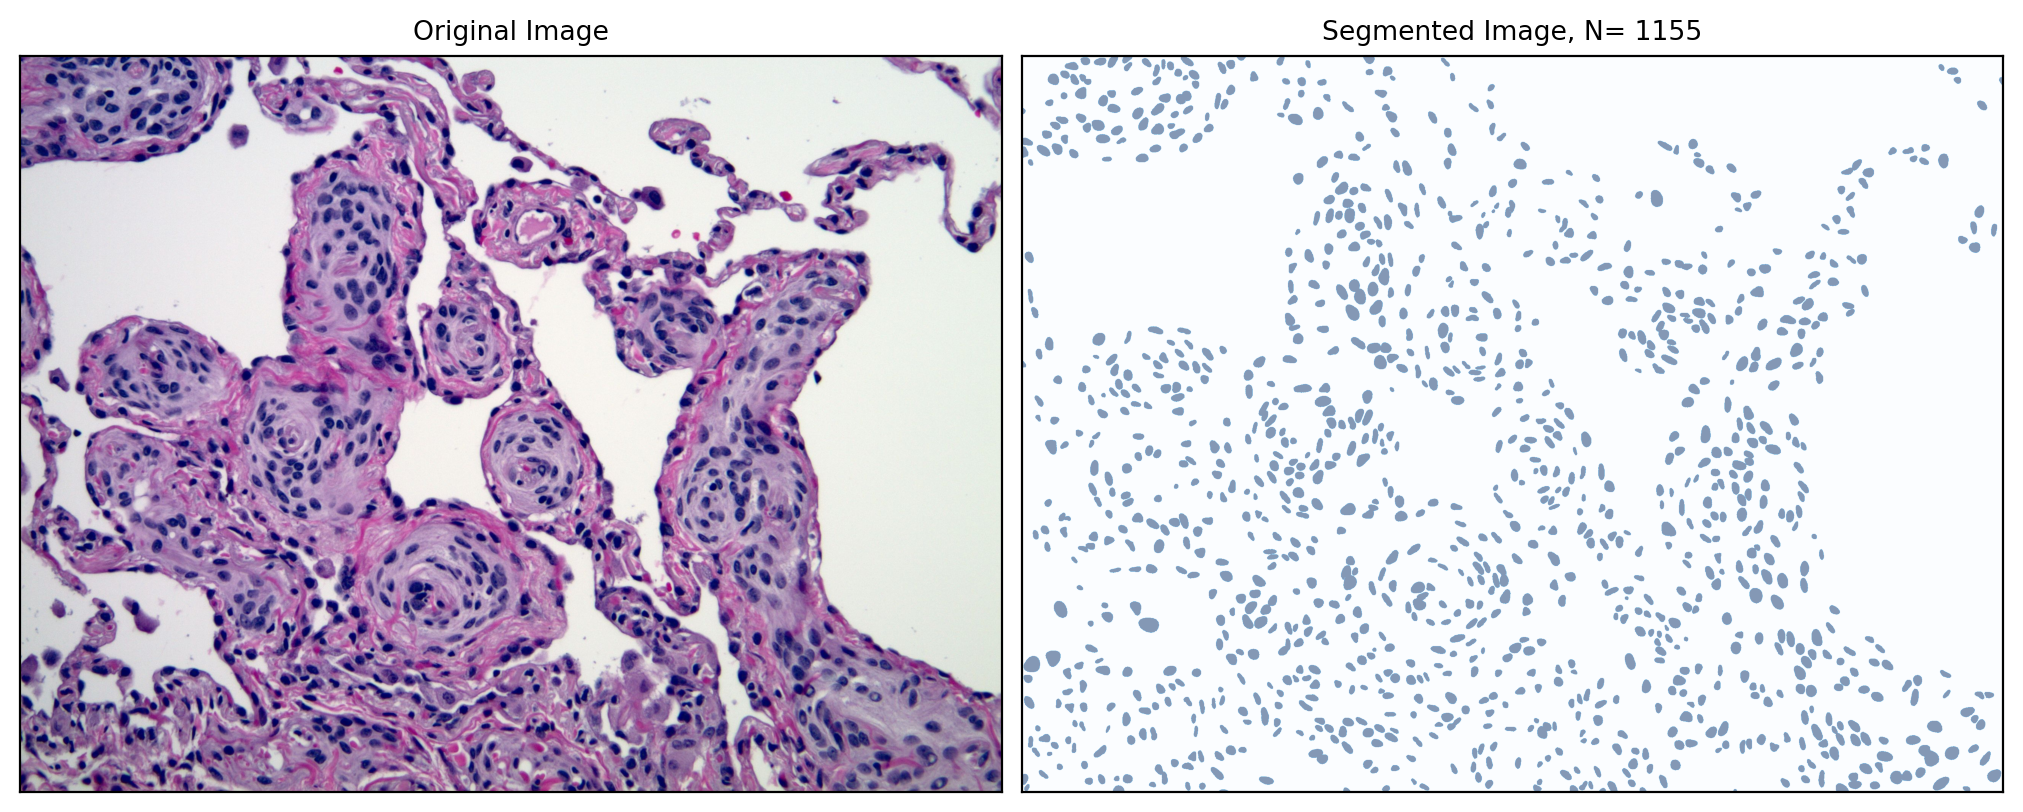

In [8]:
fig = plt.figure(figsize = (10, 5), constrained_layout = True)
ax_array = fig.subplots(1, 2, squeeze = False)

im = ax_array[0, 0].imshow(rgb_image)

im = ax_array[0, 1].imshow(modified_labels, cmap = 'Blues', 
                           vmin = 0, vmax = 1, alpha = 0.5)

ax_array[0, 0].set_title('Original Image')
ax_array[0, 1].set_title('Segmented Image, N= ' + 
                         str(len(more_info['points'])))

ax_array[0, 0].set_xticks([])
ax_array[0, 0].set_yticks([])

ax_array[0, 1].set_xticks([])
ax_array[0, 1].set_yticks([])

############################################################

result_filename = jpeg_file[:-5] + '_result.pdf'

plt.savefig(result_filename, bbox_inches='tight')

plt.show()